<a href="https://colab.research.google.com/github/Bonumchetty/project_rakuten/blob/main/Text_preprocessing_and_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# importing dependencies
import pandas as pd
import numpy as np
import re
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
path = '/content/drive/MyDrive/DATASCIENTIST/project/'

In [ ]:
# Import train and test data 
X_train = pd.read_csv(path + 'Data/X_train_update.csv', index_col = 0)
Y_train = pd.read_csv(path +'Data/Y_train_CVw08PX.csv', index_col = 0) 
X_test = pd.read_csv(path +'Data/X_test_update.csv', index_col = 0)

# PRE-PROCESSING:
## INPUT DATA ANALYSIS:

In [ ]:
# check and display X_train dataset info and 5 rows
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


### Observations: X_train has 84,916 entries and 4 columns
### Column 'description' has 29,800 empty cells

In [ ]:
# check and display Y_train dataset info and 5 rows
Y_train.info()
Y_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


### Observations: Y_train has 84,916 entries and 2 columns

In [ ]:
# check and display X_test dataset info and 5 rows
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13812 entries, 84916 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  13812 non-null  object
 1   description  8926 non-null   object
 2   productid    13812 non-null  int64 
 3   imageid      13812 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 539.5+ KB


,designation,description,productid,imageid
84916,Folkmanis Puppets - 2732 - Marionnette Et Théâ...,NaN,516376098,1019294171
84917,Porte Flamme Gaxix - Flamebringer Gaxix - 136/...,NaN,133389013,1274228667
84918,Pompe de filtration Speck Badu 95,NaN,4128438366,1295960357
84919,Robot de piscine électrique,<p>Ce robot de piscine d&#39;un design innovan...,3929899732,1265224052
84920,Hsm Destructeur Securio C16 Coupe Crois¿E: 4 X...,NaN,152993898,940543690


### Observations: X_test has 13,812 entries and 4 columns.
### Column 'description' has 4,886 empty cells

In [ ]:
# display unique product type (prdtypecode)in Y_train dataset
Y_train_prd = pd.DataFrame(Y_train['prdtypecode'].unique())
Y_train_prd

,0
0,10
1,2280
2,50
3,1280
4,2705
5,2522
6,2582
7,1560
8,1281
9,1920


###Observations: Y_train data (target variable) has 27 unique product types (prdtypecode)

In [ ]:
# join/merge X_train and Y_train datasets to identify the product type:
X_train_prd = pd.concat([X_train, Y_train], axis=1, join='inner')
X_train_prd.sample()

,designation,description,productid,imageid,prdtypecode
42163,Pixel Creation Numérique 140,NaN,234092854,959923818,2280


In [ ]:
# display X_train_prd columns type:
X_train_prd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.9+ MB


In [ ]:
# convert the 'designation' and 'description' columns from object type to String:
X_train_prd["designation"] = X_train_prd["designation"].astype(str)
X_train_prd["description"] = X_train_prd["description"].astype(str)

In [ ]:
# count the number of products per product type and display in descending order:
X_train_prd.groupby('prdtypecode').prdtypecode.count().sort_values(ascending = False)

prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: prdtypecode, dtype: int64

### We have an highly unbalanced data.
### Lagest product type class has (10209/84916) ~ 12% of the products.
### Smallest prodcut type class has (764/84916) ~ 0.9% of the products.

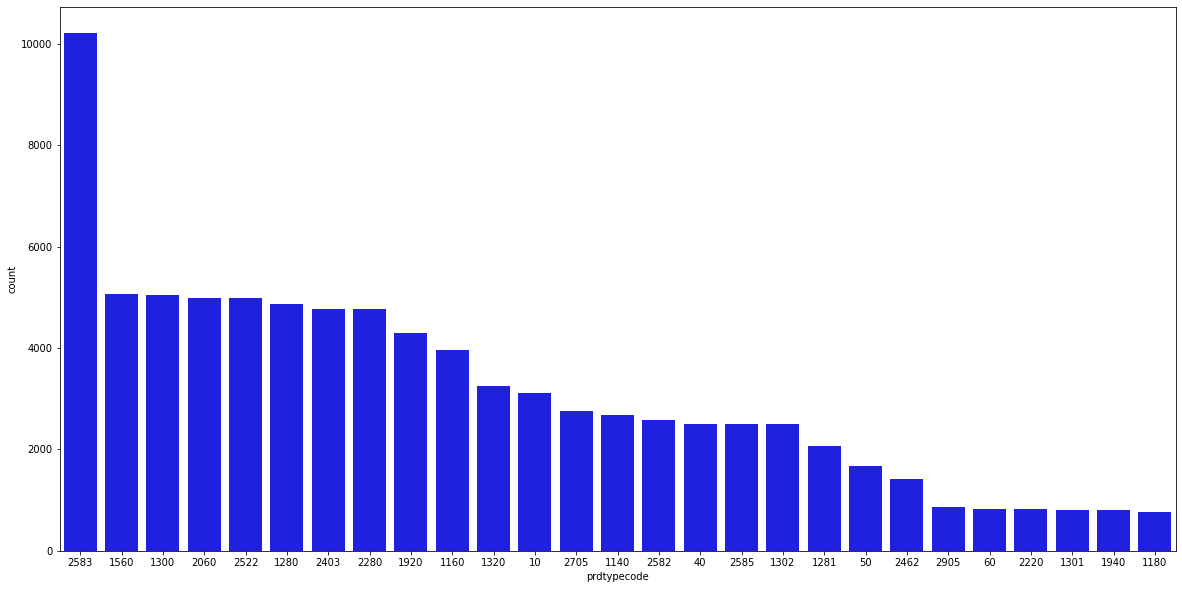

In [ ]:
# display the countplot per product type:
plt.figure(figsize = (20, 10))
sns.countplot(x =X_train_prd['prdtypecode'], order = X_train_prd['prdtypecode'].value_counts().index, color = 'blue')
plt.show();

## TEXT MINING:
### WORD COUNT (RAW DATA):

In [ ]:
# new varia to count number of words+char in X_train, X_test designation and description columns:
X_train_word_count = X_train.iloc[:,:2]
X_test_word_count = X_test.iloc[:,:2]
X_train_word_count["designation"] = X_train_word_count["designation"].astype(str)
X_train_word_count["description"] = X_train_word_count["description"].astype(str)
X_test_word_count["designation"] = X_test_word_count["designation"].astype(str)
X_test_word_count["description"] = X_test_word_count["description"].astype(str)

## X_train
# function to count number of words+char
def count_words(sentence):
  word_count = len(sentence.split())
  return word_count
# Average number of words in "designation" column:
X_train_word_count['desig_word_count'] = X_train_word_count['designation'].apply(lambda sentence : count_words(sentence))
median_desi = np.round(X_train_word_count['desig_word_count'].median(),2)
max_desi = np.round(X_train_word_count['desig_word_count'].max(),2)
print('X_train - Median length of words+char in "designation" per product before text cleaning:', median_desi)
print('X_train - Maximum of words+char in "designation" per product before text cleaning:', max_desi)

# # Average number of words+char in "description" column:
X_train_word_count['descr_word_count'] = X_train_word_count['description'].apply(lambda sentence : count_words(sentence))
median_desc = np.round(X_train_word_count['descr_word_count'].median(),2)
max_desc = np.round(X_train_word_count['descr_word_count'].max(),2)
print('X_train - Median length of words+char in "description" per product before text cleaning:', median_desc)
print('X_train - Maximum of words+char in "designation" per product before text cleaning:', max_desc)

X_train - Median length of words+char in "designation" per product before text cleaning: 11.0
X_train - Maximum of words+char in "designation" per product before text cleaning: 56
X_train - Median length of words+char in "description" per product before text cleaning: 35.0
X_train - Maximum of words+char in "designation" per product before text cleaning: 2068


In [ ]:
X_train_word_count.head()

,designation,description,desig_word_count,descr_word_count
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,nan,14,1
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,nan,39,1
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,12,109
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,nan,10,1
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,4,34


In [ ]:
## X_test
# Average number of words in "designation" column:
X_test_word_count['desig_word_count'] = X_test_word_count['designation'].apply(lambda sentence : count_words(sentence))
median_test_desi = np.round(X_test_word_count['desig_word_count'].median(),2)
max_test_desi = np.round(X_test_word_count['desig_word_count'].max(),2)
print('X_test - Median length of words+char in "designation" per product before text cleaning:', median_test_desi)
print('X_test - Maximum of words+char in "designation" per product before text cleaning:', max_test_desi)
# # Average number of words+char in "description" column:
X_test_word_count['descr_word_count'] = X_test_word_count['description'].apply(lambda sentence : count_words(sentence))
median_test_desc = np.round(X_test_word_count['descr_word_count'].median(),2)
max_test_desc = np.round(X_test_word_count['descr_word_count'].max(),2)
print('X_test - Median length of words+char in "description" per product before text cleaning:', median_test_desc)
print('X_test - Maximum of words+char in "description" per product before text cleaning:', max_test_desc)

X_test - Median length of words+char in "designation" per product before text cleaning: 11.0
X_test - Maximum of words+char in "designation" per product before text cleaning: 52
X_test - Median length of words+char in "description" per product before text cleaning: 34.0
X_test - Maximum of words+char in "description" per product before text cleaning: 3371


# ***X_train:***
### Median length of words+char in X_train dataset (desination column) is ~11, with a maxmimum of 56 words.
### Median length number of words+char in X_train dataset (description column) is ~35, with a maximum of 2068 words.

# ***X_test:***
### Median length of words+char in X_test dataset (desination column) is ~11, with a maxmimum of 52 words.
### Median length number of words+char in X_test dataset (description column) is ~34, with a maximum of 3371 words.

## TOKENIZATION

In [ ]:
# Concatenate X_train and X_test datasets:
frames = [X_train, X_test]
X_data_concat = pd.concat(frames)

In [ ]:
# display X_data_concat info:
X_data_concat.info()
X_data_concat.sample()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98728 entries, 0 to 98727
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  98728 non-null  object
 1   description  64042 non-null  object
 2   productid    98728 non-null  int64 
 3   imageid      98728 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


,designation,description,productid,imageid
95703,100pcs Bâton De Comptage Coloré En Bois Montes...,<p><b>La description:</b></p><br /><p> Tiges d...,4214659786,1319657426


In [ ]:
X_data_concat["designation"] = X_data_concat["designation"].astype(str)
X_data_concat["description"] = X_data_concat["description"].astype(str)

In [ ]:
# removing special characters and symbols:
X_data_concat['designation'] = X_data_concat['designation'].apply(lambda x: re.sub('\W+'," ", x ))
X_data_concat['description'] = X_data_concat['description'].apply(lambda x: re.sub('\W+'," ", x ))

# removing numbers:
X_data_concat['designation'] = X_data_concat['designation'].apply(lambda x: re.sub('\d+'," ", x ))
X_data_concat['description'] = X_data_concat['description'].apply(lambda x: re.sub('\d+'," ", x ))
X_data_concat.head()

,designation,description,productid,imageid
0,Olivia Personalisiertes Notizbuch Seiten Pun...,nan,3804725264,1263597046
1,Journal Des Arts Le N Du L art Et Son ...,nan,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald Europe Disneyland Marionnette...,nan,50418756,457047496
4,La Guerre Des Tuques,Luc a des id eacute es de grandeur Il veut org...,278535884,1077757786


In [ ]:
# declaring special text, text format:
list_special_char = '<.*?>|&([a-z0-9]+|#[0-9]{1,9}|#x[0-9a-f]{1,9});|&([A-Z])'

In [ ]:
#function to remove stopwords:
def clean_sentence(sentence):
  stop_words = set(stopwords.words('french'))
  stop_words_new = ['br' 'Â', 'â·', 'v', 's']
  stop_words.update(stop_words_new)
  tokens = []
  for word in sentence:
    if word not in stop_words:
      tokens.append(word)
  return tokens

In [ ]:
# function to tokenize:
def raw_to_tokens(raw_string):
  tokens = {}
  raw_string = sent_tokenize(raw_string)
  for i, sent in enumerate(raw_string) :
        sent_sp = re.sub(list_special_char, ' ', str(sent))  
        sent_token = word_tokenize(sent_sp)                       
        sent_lower = [word.lower() for word in sent_token]
        sent_clean = clean_sentence(sent_lower)
        tokens[i]=sent_clean
  return tokens

In [ ]:
# word tokenization of 'designation' and 'description' columns:
X_data_concat['designation_Tokenized'] = X_data_concat['designation'].apply(lambda raw_string : raw_to_tokens(raw_string))
X_data_concat['description_Tokenized'] = X_data_concat['description'].apply(lambda raw_string : raw_to_tokens(raw_string))
X_data_concat.head()

,designation,description,productid,imageid,designation_Tokenized,description_Tokenized
0,Olivia Personalisiertes Notizbuch Seiten Pun...,nan,3804725264,1263597046,"{0: ['olivia', 'personalisiertes', 'notizbuch'...",{0: ['nan']}
1,Journal Des Arts Le N Du L art Et Son ...,nan,436067568,1008141237,"{0: ['journal', 'arts', 'art', 'marche', 'salo...",{0: ['nan']}
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978,"{0: ['grand', 'stylet', 'ergonomique', 'bleu',...","{0: ['pilot', 'style', 'touch', 'pen', 'marque..."
3,Peluche Donald Europe Disneyland Marionnette...,nan,50418756,457047496,"{0: ['peluche', 'donald', 'europe', 'disneylan...",{0: ['nan']}
4,La Guerre Des Tuques,Luc a des id eacute es de grandeur Il veut org...,278535884,1077757786,"{0: ['guerre', 'tuques']}","{0: ['luc', 'a', 'id', 'eacute', 'grandeur', '..."


In [ ]:
X_data_concat.to_csv(path + 'Data/X_data_concat_tokenized.csv', encoding='utf-8', index=False)

## WORD COUNT (PROCESSED DATA)

In [ ]:
X_data_concat_word_count = pd.read_csv(path + '/Data/X_data_concat_tokenized.csv')
X_data_concat_word_count["designation"] = X_data_concat_word_count["designation"].astype(str)
X_data_concat_word_count["description"] = X_data_concat_word_count["description"].astype(str)

## X_train
# function to count number of words+char
def count_words(sentence):
  word_count = len(sentence.split())
  return word_count
# # Average number of words in "designation" column:
# X_data_concat_word_count['desig_word_count'] = X_data_concat_word_count['designation'].apply(lambda sentence : count_words(sentence))
# mean = np.round(X_data_concat_word_count['desig_word_count'].mean(),2)
# print('X_train - Average number of words+char in "designation" per product before text cleaning:', mean)

# # # Average number of words+char in "description" column:
# X_data_concat_word_count['descr_word_count'] = X_data_concat_word_count['description'].apply(lambda sentence : count_words(sentence))
# mean = np.round(X_data_concat_word_count['descr_word_count'].mean(),2)
# print('X_train - Average number of words+char in "description" per product before text cleaning:', mean)


# Average number of words in "designation" column:
X_data_concat_word_count['desig_word_count'] = X_data_concat_word_count['designation'].apply(lambda sentence : count_words(sentence))
median_desi = np.round(X_data_concat_word_count['desig_word_count'].median(),2)
max_desi = np.round(X_data_concat_word_count['desig_word_count'].max(),2)
print('X_train - Median length of words+char in "designation" per product after text cleaning:', median_desi)
print('X_train - Maximum of words+char in "designation" per product before text cleaning:', max_desi)

# # Average number of words+char in "description" column:
X_data_concat_word_count['descr_word_count'] = X_data_concat_word_count['description'].apply(lambda sentence : count_words(sentence))
median_desc = np.round(X_data_concat_word_count['descr_word_count'].median(),2)
max_desc = np.round(X_data_concat_word_count['descr_word_count'].max(),2)
print('X_train - Median length of words+char in "description" per product after text cleaning:', median_desc)
print('X_train - Maximum of words+char in "designation" per product before text cleaning:', max_desc)

X_train - Median length of words+char in "designation" per product after text cleaning: 10.0
X_train - Maximum of words+char in "designation" per product before text cleaning: 47
X_train - Median length of words+char in "description" per product after text cleaning: 35.0
X_train - Maximum of words+char in "designation" per product before text cleaning: 3660


# ***X_train(after text mining):***
### Median length of words+char in X_train dataset (desination column) is ~10, with a maxmimum of 47 words.
### Median length number of words+char in X_train dataset (description column) is ~35, with a maximum of 3660 words.

## Vectorization (using TfidVectorizer)

In [ ]:
X_data_concat = pd.read_csv(path + '/Data/X_data_concat_tokenized.csv')
X_data_concat_desig = X_data_concat['designation']
X_data_concat_descr = X_data_concat['description']
# TfidfVectorizer object initiation:
tfidf = TfidfVectorizer()

# vectorize the 'designation' column:
X_tfidf_desig = tfidf.fit_transform(X_data_concat_desig.astype('U'))
print("Shape of the TF-IDF Matrix ('desgination'):")
print(X_tfidf_desig.shape)

Shape of the TF-IDF Matrix ('desgination'):
(98728, 66977)


In [ ]:
# vectorize the 'description' column:
X_tfidf_descr = tfidf.fit_transform(X_data_concat_descr.astype('U'))
print("Shape of the TF-IDF Matrix ('description'):")
print(X_tfidf_descr.shape)

Shape of the TF-IDF Matrix ('description'):
(98728, 116525)


In [ ]:
# splitting train and test datasets:
X_train = X_tfidf_desig[:84916, : ]
X_test = X_tfidf_desig[84916:, : ]
y_train = pd.read_csv(path +'/Data/Y_train_CVw08PX.csv', index_col = 0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 21)

## Multi-Label Classification:
### The dataset is a multi-label classification model. Below are the common models for the analysis of the database:
### Decision Trees
### Random Forests
### Gradient Boosting

## RANDOM FOREST:

In [ ]:
# Random Forest Classifier model:
rf_clf = ensemble.RandomForestClassifier(n_jobs = 1, random_state = 42)
# train the model on the training set:
rf_clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_jobs=1, random_state=42)

In [ ]:
# Predict the test set data:
y_pred = pd.DataFrame(rf_clf.predict(X_test))

In [ ]:
y_probas = rf_clf.predict_proba(X_test)
y_probas

array([[0.  , 0.  , 0.  , ..., 0.89, 0.  , 0.  ],
       [0.09, 0.01, 0.01, ..., 0.  , 0.24, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.  , ..., 0.  , 0.04, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
# Random Forest Classifier score:
rf_clf.score(X_test, y_test)

0.7802534269160111

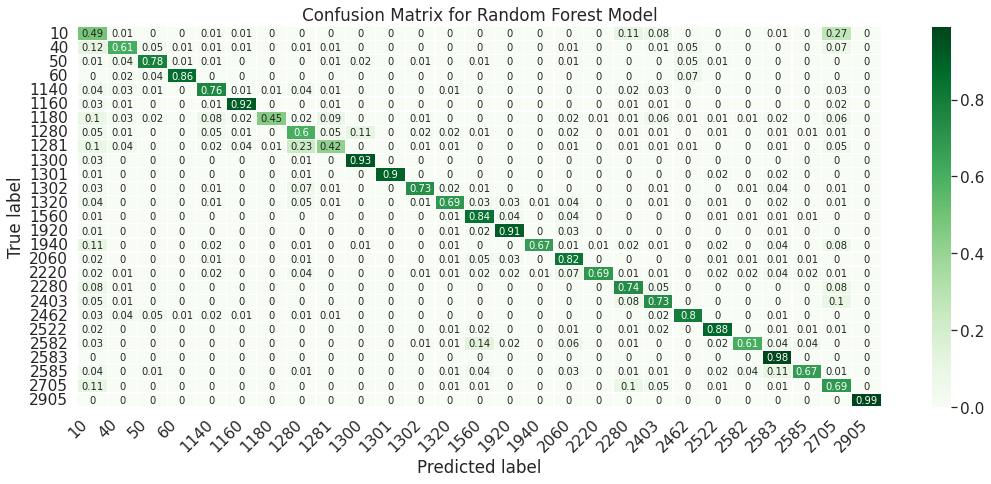

In [ ]:
#confusion matrix data
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = np.around(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], decimals=2)

# Build the plot
plt.figure(figsize=(18,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['10', '40', '50', '60', '1140', '1160', '1180', '1280', '1281', '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060', '2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585', '2705', '2905']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

              precision    recall  f1-score       support
10             0.485046  0.328634  0.391807   1135.000000
40             0.612440  0.739884  0.670157    519.000000
50             0.784653  0.808673  0.796482    392.000000
60             0.855814  0.938776  0.895377    196.000000
1140           0.762611  0.759232  0.760918    677.000000
1160           0.919223  0.920164  0.919693    977.000000
1180           0.452261  0.849057  0.590164    106.000000
1280           0.603819  0.718750  0.656291   1056.000000
1281           0.422311  0.609195  0.498824    348.000000
1300           0.933280  0.873606  0.902458   1345.000000
1301           0.898058  0.973684  0.934343    190.000000
1302           0.734789  0.880374  0.801020    535.000000
1320           0.693727  0.818578  0.750999    689.000000
1560           0.842723  0.790169  0.815600   1363.000000
1920           0.910900  0.875228  0.892708   1098.000000
1940           0.671875  0.848684  0.750000    152.000000
2060          

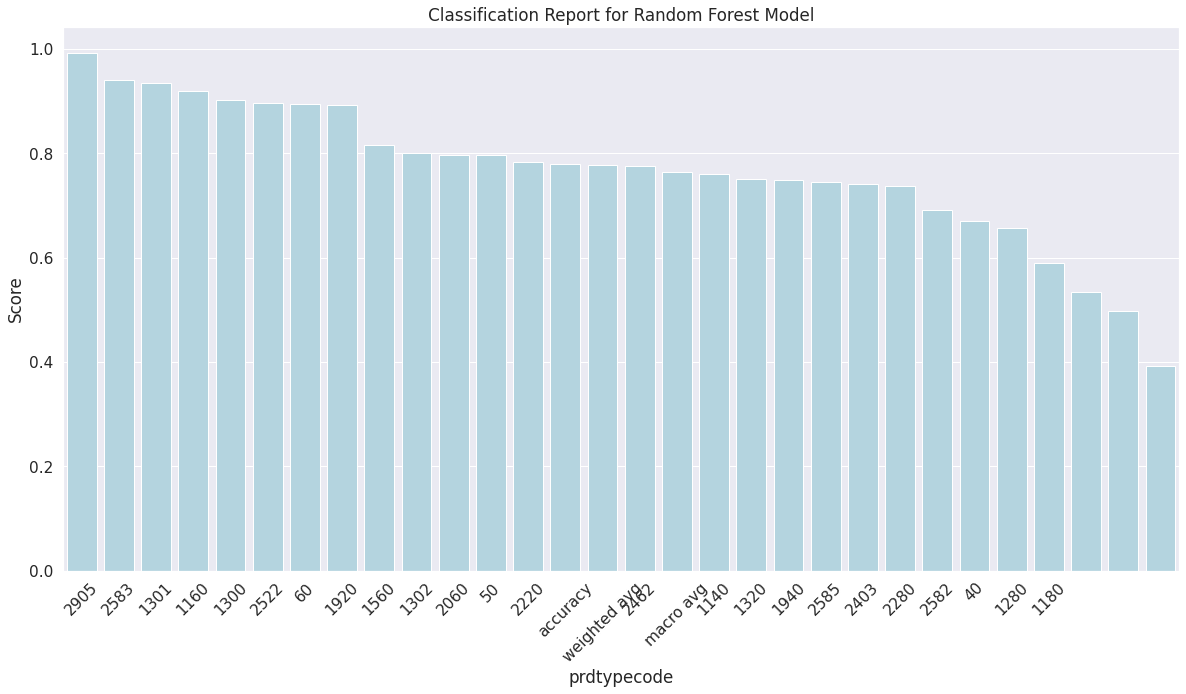

In [ ]:
# classification report of the model:
report = classification_report(y_pred, y_test, output_dict=True)
report_df = pd.DataFrame(report).T
report_df.to_csv("classification_report_rf_clf.csv")

cr = pd.read_csv("classification_report_rf_clf.csv", index_col=0)
print(cr)
cr_f1= cr.iloc[0:-3,:]
cr_f1 = cr.sort_values(by= 'f1-score', axis=0, ascending=False)

fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x=cr_f1.index, y='f1-score',  data = cr_f1, color = 'lightblue')
# sns.barplot(x=cr_f1.index, y=cr_f1['precision'], color = 'orange')
plt.xticks(tick_marks, cr_f1.index , rotation=45)
plt.xlabel('prdtypecode')
plt.ylabel('Score')
plt.title('Classification Report for Random Forest Model')
plt.show();

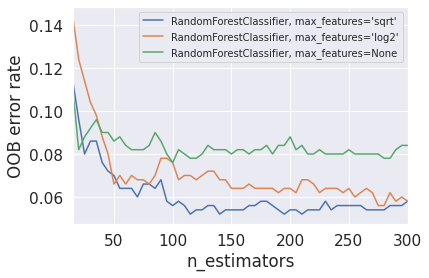

In [ ]:
#Out of Bag error:

RANDOM_STATE = 123

# Generate a binary classification dataset.
X_train, y_train = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of 'n_estimators' values to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
# plt.figure(figsize=(18,7))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc='best', fontsize=10, title_fontsize=15)
plt.show()

# OBSERVATIONS:
## f1 Score for the text mining and analysis is 0.778301
## prediction Score for the text mining and analysis is 0.785816
## recall Score for the text mining and analysis is 0.780253

## RANDOM FOREST WITH 3 FOLD CROSS VALIDATION TO GET BEST PARAMETERS:

In [ ]:
X_train = X_tfidf_desig[:84916, : ]
X_test = X_tfidf_desig[84916:, : ]
y_train = pd.read_csv(path +'/Data/Y_train_CVw08PX.csv', index_col = 0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state = 21)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # use decision tree as base estimator
bagging = BaggingClassifier(None, 20)

bagging.fit(X_train, y_train.values.ravel())

BaggingClassifier(n_estimators=20)

In [ ]:
y_pred = pd.DataFrame(bagging.predict(X_test))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(50, 150, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150], 'max_depth': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# random grid to search for best hyperparameters
rf = RandomForestClassifier()
# parameters using 3 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 20, cv = 3, verbose=1, random_state=42, scoring = 'f1_weighted')

# train the model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 31, 52, 73, 94, 115,
                                                      136, 157, 178, 200,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 61, 72, 83, 94,
                                                         105, 116, 127, 138,
                                                         150]},
                   random_state=42, scoring='f1_weighted', verbose=1)

In [ ]:
# best parameters:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 178,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [ ]:
# cross validation results:
rf_random.cv_results_

{'mean_fit_time': array([ 84.54025841,   6.34576694,  18.98368398,  51.86923393,
         87.22376919,  74.58104595,  84.63909507,  37.64120865,
         78.94468633,   8.16132037,  28.78563905,   6.58855295,
        151.39130155,  30.90102426,  81.07431674, 162.6784157 ,
         72.86745962,  37.64079436,  66.4053568 ,  37.15571523]),
 'mean_score_time': array([1.37658032, 0.62735248, 0.56545981, 0.7458926 , 0.92527564,
        1.22149754, 1.37174249, 1.17118192, 1.25084201, 0.86112475,
        0.8357141 , 0.4927392 , 1.9514118 , 1.03352833, 1.17233308,
        1.6431152 , 1.29337899, 1.24824071, 1.66956727, 0.9742581 ]),
 'mean_test_score': array([0.5923867 , 0.22412623, 0.55870739, 0.62658315, 0.72180842,
        0.63528992, 0.68431471, 0.59985568, 0.65345593, 0.22415127,
        0.47575479, 0.23347921, 0.66797587, 0.53262326, 0.63161591,
        0.69184591, 0.58564094, 0.50202213, 0.67710325, 0.63432906]),
 'param_bootstrap': masked_array(data=[False, True, True, False, False, Fal

In [ ]:
# transform the random forest model on the test set:
y_pred = pd.DataFrame(rf_random.predict(X_test))

In [ ]:
# calculate the score with the best hyper parameter and parameters
from sklearn.model_selection import cross_val_score

clf_rand = RandomForestClassifier(n_estimators = 50, min_samples_split = 10, min_samples_leaf = 1, max_depth = 178 ,max_features = 'auto', bootstrap = False)
cross_val_score(clf_rand, X_train,y_train.values.ravel(), cv=3, scoring = 'accuracy')

array([0.72749541, 0.73145226, 0.73201752])

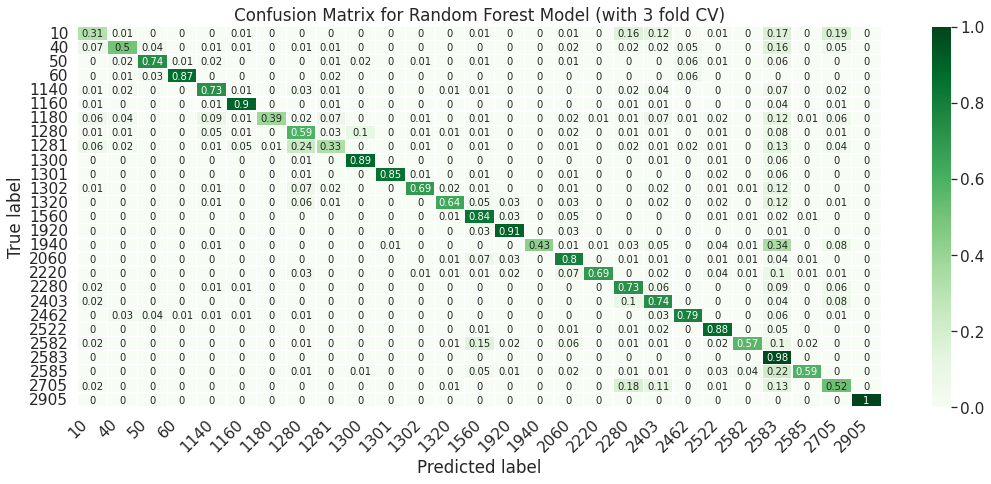

In [ ]:
#confusion matrix data
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = np.around(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], decimals=2)

# Build the plot
plt.figure(figsize=(18,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['10', '40', '50', '60', '1140', '1160', '1180', '1280', '1281', '1300', '1301', '1302', '1320', '1560', '1920', '1940', '2060', '2220', '2280', '2403', '2462', '2522', '2582', '2583', '2585', '2705', '2905']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model (with 3 fold CV)')
plt.show()

              precision    recall  f1-score       support
10             0.309493  0.530067  0.390805    449.000000
40             0.503987  0.778325  0.611810    406.000000
50             0.742574  0.835655  0.786370    359.000000
60             0.869767  0.944444  0.905569    198.000000
1140           0.728487  0.755385  0.741692    650.000000
1160           0.902863  0.912190  0.907503    968.000000
1180           0.391960  0.886364  0.543554     88.000000
1280           0.592681  0.703494  0.643351   1059.000000
1281           0.332669  0.585965  0.424396    285.000000
1300           0.889595  0.876369  0.882933   1278.000000
1301           0.854369  0.967033  0.907216    182.000000
1302           0.686427  0.897959  0.778073    490.000000
1320           0.637146  0.872054  0.736318    594.000000
1560           0.835681  0.748423  0.789649   1427.000000
1920           0.906161  0.878676  0.892207   1088.000000
1940           0.427083  0.964706  0.592058     85.000000
2060          

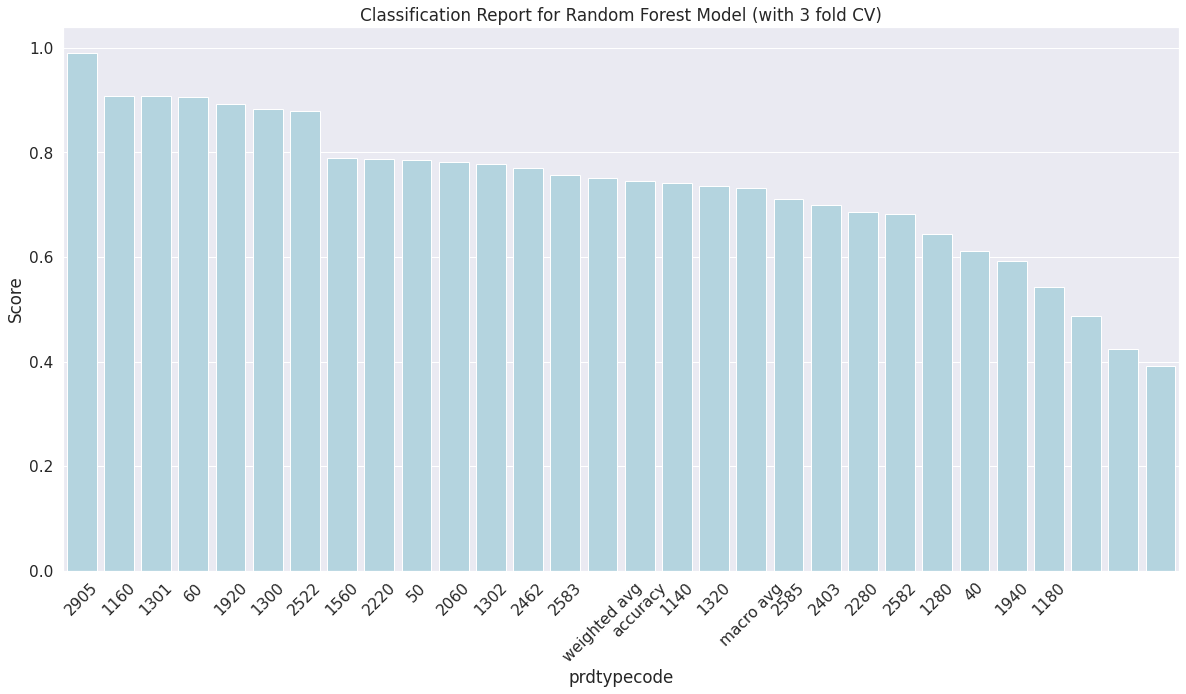

In [ ]:
# classification report of the model:
report = classification_report(y_pred, y_test, output_dict=True)
report_df = pd.DataFrame(report).T
report_df.to_csv("classification_report_rf_clf_3foldcv.csv")

cr = pd.read_csv("classification_report_rf_clf_3foldcv.csv", index_col=0)
print(cr)
cr_f1= cr.iloc[0:-3,:]
cr_f1 = cr.sort_values(by= 'f1-score', axis=0, ascending=False)

fig, ax1 = plt.subplots(figsize=(20, 10))
sns.barplot(x=cr_f1.index, y='f1-score',  data = cr_f1, color = 'lightblue')
# sns.barplot(x=cr_f1.index, y=cr_f1['precision'], color = 'orange')
plt.xticks(tick_marks, cr_f1.index , rotation=45)
plt.xlabel('prdtypecode')
plt.ylabel('Score')
plt.title('Classification Report for Random Forest Model (with 3 fold CV)')
plt.show();

# OBSERVATIONS:
## f1 Score for the text mining and analysis is 0.751609
## prediction Score for the text mining and analysis is 0.784837
## recall Score for the text mining and analysis is 0.745207


## From the classification report, we notice that some products have f1 scoer greater than 0.9.

In [ ]:
group = X_data_concat_word_count.copy()
group['prdtypecode'] = Y_train['prdtypecode']
del group['productid'], group['imageid'], group['desig_word_count'], group['descr_word_count'], group['description'],group['description_Tokenized']
group_cat = group.groupby(group['prdtypecode'] == 2583)
group_cat.head()

,designation,designation_Tokenized,prdtypecode
0,Olivia Personalisiertes Notizbuch Seiten Pun...,"{0: ['olivia', 'personalisiertes', 'notizbuch'...",10.0
1,Journal Des Arts Le N Du L art Et Son ...,"{0: ['journal', 'arts', 'art', 'marche', 'salo...",2280.0
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,"{0: ['grand', 'stylet', 'ergonomique', 'bleu',...",50.0
3,Peluche Donald Europe Disneyland Marionnette...,"{0: ['peluche', 'donald', 'europe', 'disneylan...",1280.0
4,La Guerre Des Tuques,"{0: ['guerre', 'tuques']}",2705.0
20,Kit de désinfection pour piscines enfants,"{0: ['kit', 'désinfection', 'piscines', 'enfan...",2583.0
39,Bouée gonflable River tube OOGARDEN,"{0: ['bouée', 'gonflable', 'river', 'tube', 'o...",2583.0
53,Testeur électronique de pH,"{0: ['testeur', 'électronique', 'ph']}",2583.0
58,Pompe de filtration Speck Badu,"{0: ['pompe', 'filtration', 'speck', 'badu']}",2583.0
64,AstralCom CV Mono de DAB Surpresseur piscine,"{0: ['astralcom', 'cv', 'mono', 'dab', 'surpre...",2583.0
